## Absentismo segun datos personales


In [93]:
# importación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
# importo los csv que ha creado el compañero José

df_employees = pd.read_csv("df_employees.csv")
df_work = pd.read_csv("df_work.csv")
df_absen = pd.read_csv("df_absen.csv")
pki = pd.read_csv("pki.csv")

In [95]:
# Asegurar orden correcto de los meses
ordered_months = ['January','February','March','April','May','June',
                  'July','August','September','October','November','December']
pki['Month_absence_name'] = pd.Categorical(pki['Month_absence_name'], categories=ordered_months, ordered=True)

# Total de horas de absentismo por mes
hours_per_month = pki.groupby('Month_absence_name', observed=True)['Absenteeism_hours'].sum().reset_index()

# Total de días estimados de absentismo por mes ¿cuánto tiempo están sin trabajar?
# Refleja la duración total de las ausencias en cada mes (días redondeados)
days_per_month = pki.groupby('Month_absence_name', observed=True)['Estimated_Absence_Days'].sum().round(0).astype(int).reset_index()


# Número de ausencias registradas por mes ¿cuántas veces la gente falta?
# Refleja la frecuencia con la que ocurren las ausencias
count_per_month = pki.groupby('Month_absence_name', observed=True)['ID'].count().reset_index()
count_per_month.rename(columns={'ID': 'Absence_Records'}, inplace=True)

## PRUEBAS: HAY RELACION ENTRE DATOS PERSONALES Y AUSENCIAS?

In [96]:
#NOMBRES DE DATAFRAMES 
#df_employees 
#df_absen 


In [97]:
# columnas que voy a necesitar (id, Social_drinker, Social_smoker, son)
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               37 non-null     int64
 1   Age              37 non-null     int64
 2   Weight           37 non-null     int64
 3   Height           37 non-null     int64
 4   Body_mass_index  37 non-null     int64
 5   Education        37 non-null     int64
 6   Son              37 non-null     int64
 7   Pet              37 non-null     int64
 8   Social_drinker   37 non-null     int64
 9   Social_smoker    37 non-null     int64
dtypes: int64(10)
memory usage: 3.0 KB


In [98]:
df_absen.info() #(Absenteeism_hours, Estimated_Absence_Days)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      732 non-null    int64  
 1   Reason_absence          732 non-null    object 
 2   Absenteeism_hours       732 non-null    int64  
 3   Estimated_Absence_Days  732 non-null    float64
 4   Month_absence_name      732 non-null    object 
 5   Day_week_name           732 non-null    object 
 6   Seasons_name            732 non-null    object 
 7   Hit_target              732 non-null    int64  
 8   Work_load_Average_day   732 non-null    float64
 9   Disciplinary_failure    732 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 57.3+ KB


In [99]:
#Hago merge de df_absen y df_employees

df_datospersonales = pd.merge(df_absen, df_employees, on='ID', how='left')

CORRELACION PARA VER RELACION Y QUE DESTACA

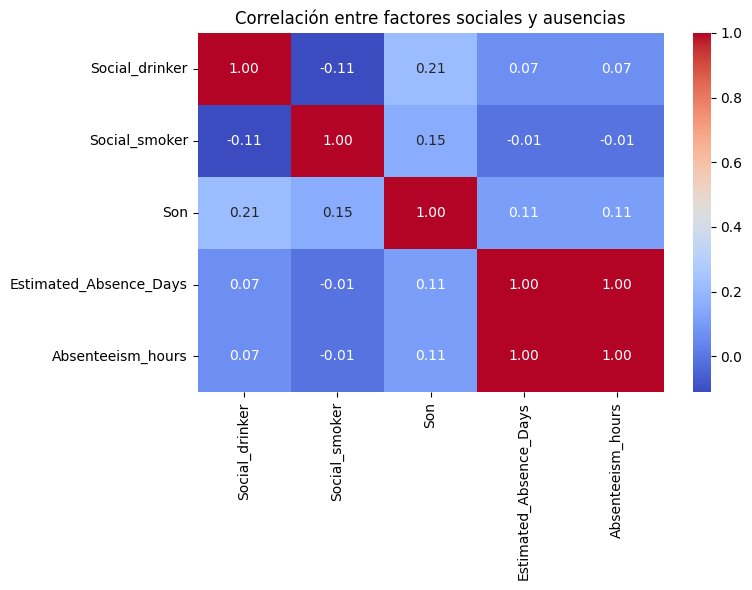

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas de interés
cols = ['Social_drinker', 'Social_smoker', 'Son', 'Estimated_Absence_Days', 'Absenteeism_hours']

# Calcular matriz de correlación
corr_matrix = df_datospersonales[cols].corr()

# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre factores sociales y ausencias")
plt.tight_layout()
plt.show()

#print(corr_matrix)

#Tener hijos se asocia con un ligero aumento en días de ausencia, pero la correlación no es fuerte ni destacable en términos estrictos.es 0.11, que es una correlación positiva débil.
#Beber socialmente (Social_drinker) tiene una correlación muy baja pero positiva (0.067).
#Fumar socialmente (Social_smoker) prácticamente no se relaciona con ausencias (correlación ~0).

Estadistica descriptiva para ver si varian los días de ausencia según si alguien fuma, bebe o tiene hijos.

SOCIAL DRINKER

In [101]:
# Promedio de días de ausencia según si es bebedor social
df_datospersonales.groupby('Social_drinker')['Estimated_Absence_Days'].mean()

Social_drinker
0    0.744623
1    0.969275
Name: Estimated_Absence_Days, dtype: float64

SOCIAL SMOKER

In [102]:
# Promedio de días de ausencia según si es bebedor social
df_datospersonales.groupby('Social_smoker')['Estimated_Absence_Days'].mean()

Social_smoker
0    0.876386
1    0.812593
Name: Estimated_Absence_Days, dtype: float64

HIJOS

In [103]:
# Promedio de días de ausencia según cantidad de hijos
df_datospersonales.groupby('Son')['Estimated_Absence_Days'].mean()


#en la media de dias si que hay una diferencia significativa sobretodo 2 y 3 hijos supone casi el doble de 0 hijos

#podria agruparlo entre si tienen o no tienen hijos 
#hacer compraracion por horas 

Son
0    0.683448
1    0.753712
2    1.321154
3    1.525333
4    0.911667
Name: Estimated_Absence_Days, dtype: float64

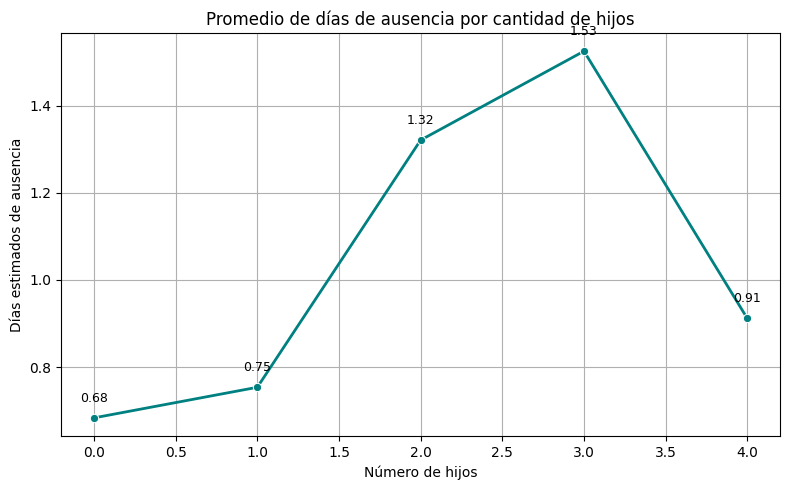

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la media
media_por_hijos = df_datospersonales.groupby('Son')['Estimated_Absence_Days'].mean().reset_index()

# Graficar
plt.figure(figsize=(8, 5))
sns.lineplot(data=media_por_hijos, x='Son', y='Estimated_Absence_Days', marker='o', linewidth=2, color='teal')

# Añadir etiquetas sobre los puntos
for i, row in media_por_hijos.iterrows():
    plt.text(row['Son'], row['Estimated_Absence_Days'] + 0.03, f"{row['Estimated_Absence_Days']:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.title("Promedio de días de ausencia por cantidad de hijos")
plt.xlabel("Número de hijos")
plt.ylabel("Días estimados de ausencia")
plt.grid(True)
plt.tight_layout()
plt.show()


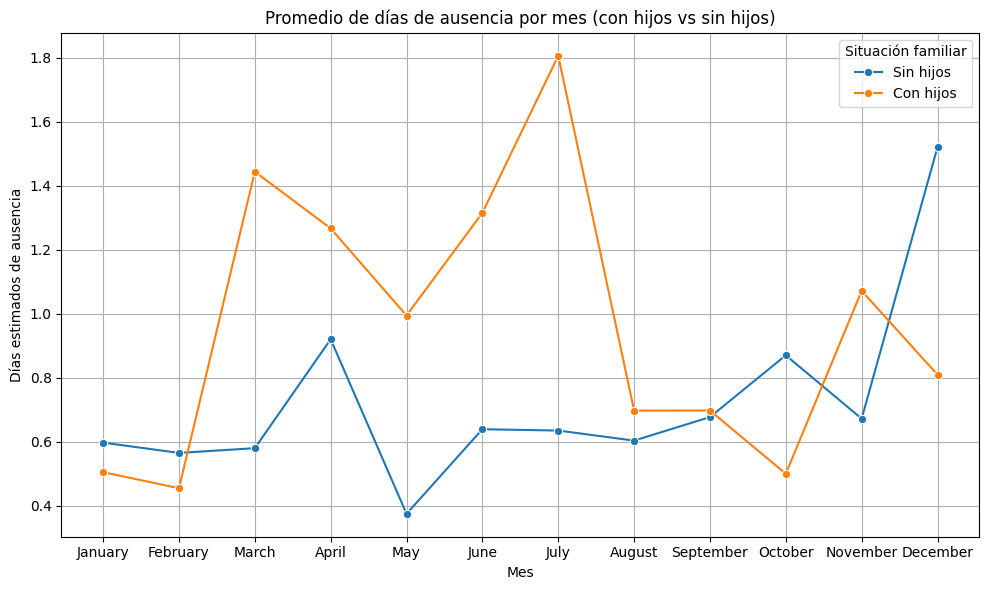

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear columna booleana "Tiene_hijos"
df_datospersonales['Tiene_hijos'] = df_datospersonales['Son'] > 0

# Agrupar por mes y si tienen hijos
ausencias_por_mes = df_datospersonales.groupby(['Month_absence_name', 'Tiene_hijos'])['Estimated_Absence_Days'].mean().reset_index()

# Ordenar meses correctamente
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
ausencias_por_mes['Month_absence_name'] = pd.Categorical(ausencias_por_mes['Month_absence_name'], categories=orden_meses, ordered=True)
ausencias_por_mes = ausencias_por_mes.sort_values('Month_absence_name')

# Reemplazar valores booleanos por etiquetas más legibles
ausencias_por_mes['Tiene_hijos'] = ausencias_por_mes['Tiene_hijos'].map({True: 'Con hijos', False: 'Sin hijos'})

# Graficar
plt.figure(figsize=(10, 6))
sns.lineplot(data=ausencias_por_mes, x='Month_absence_name', y='Estimated_Absence_Days', hue='Tiene_hijos', marker='o')

plt.title("Promedio de días de ausencia por mes (con hijos vs sin hijos)")
plt.xlabel("Mes")
plt.ylabel("Días estimados de ausencia")
plt.legend(title="Situación familiar")
plt.grid(True)
plt.tight_layout()
plt.show()




- Sí hay una relación entre tener hijos y los días de ausencia, pero depende del mes.
- Los meses escolares (julio, marzo) muestran mayores ausencias entre padres.
- El comportamiento cambia en diciembre, lo que sugiere que no todos los patrones se explican solo por hijos, sino también por cultura corporativa y calendario festivo brasileño.

 
 Contexto brasileño relevante:

    Julio : vacaciones escolares oficiales.

    Enero y Diciembre: época de festividades, Navidad, Año Nuevo, y descanso colectivo en algunas empresas.

    Carnaval (febrero a marzo): afecta marzo en este dataset (altas ausencias entre padres).

    Empresas pueden tener “licenças médicas”, “atestado médico” o “folgas legais” más utilizadas en estas fechas.

Ver tambien si por edades hay mas ausencias?

EDAD

In [107]:
#Rango de edades
edad_min = df_datospersonales['Age'].min()
edad_max = df_datospersonales['Age'].max()
print(f"Edad mínima: {edad_min}, Edad máxima: {edad_max}")

Edad mínima: 27, Edad máxima: 58


In [108]:
# Promedio de días de ausencia por edad
df_by_age = df_datospersonales.groupby('Age')['Estimated_Absence_Days'].mean().reset_index()


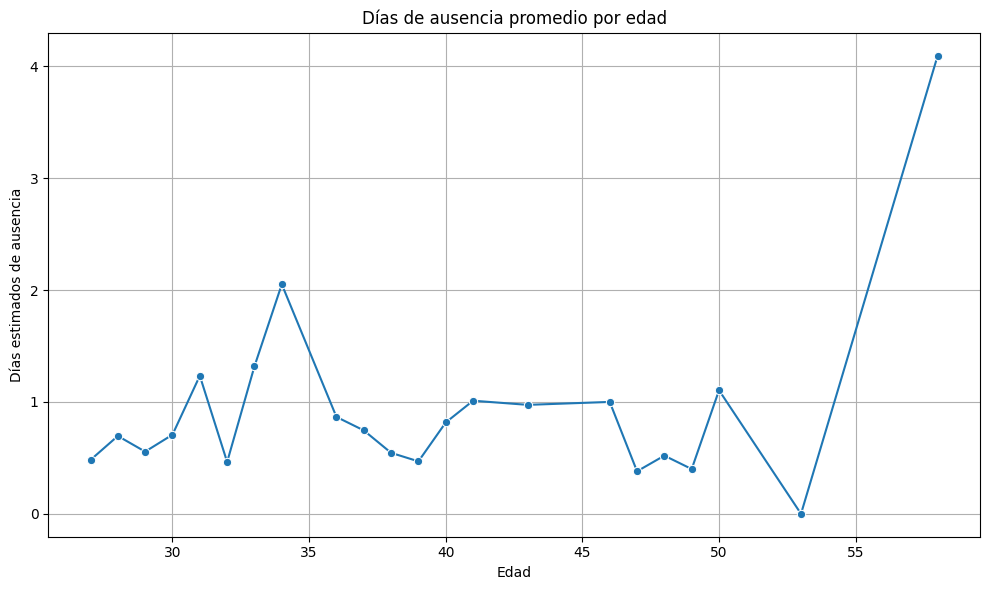

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_by_age, x='Age', y='Estimated_Absence_Days', marker='o')
plt.title("Días de ausencia promedio por edad")
plt.xlabel("Edad")
plt.ylabel("Días estimados de ausencia")
plt.grid(True)
plt.tight_layout()
plt.show()


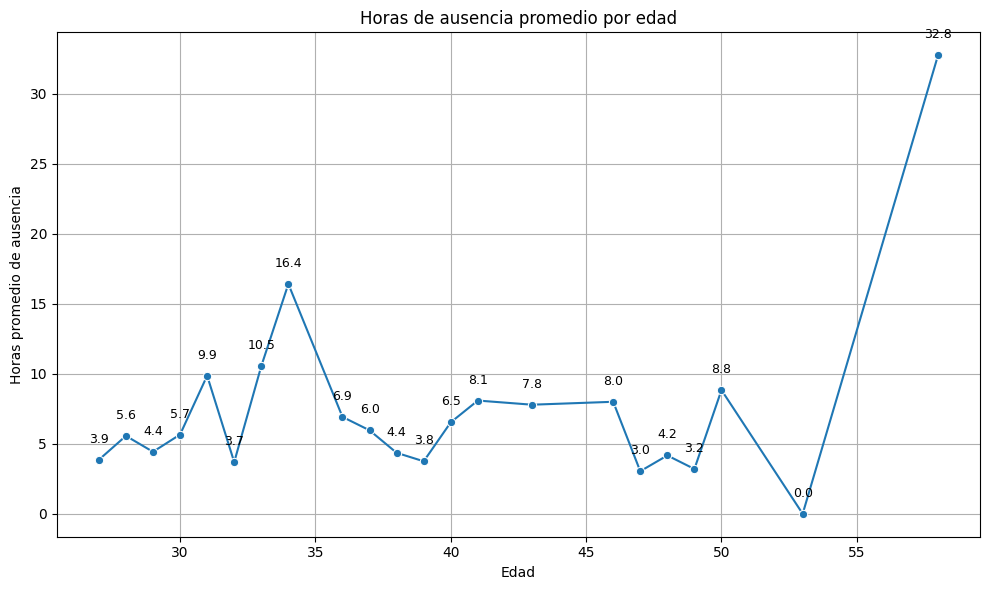

In [110]:
# Promedio de horas de ausencia por edad
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por edad y calcular promedio de horas de ausencia
df_by_age_hours = df_datospersonales.groupby('Age')['Absenteeism_hours'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_by_age_hours, x='Age', y='Absenteeism_hours', marker='o')
plt.title("Horas de ausencia promedio por edad")
plt.xlabel("Edad")
plt.ylabel("Horas promedio de ausencia")
plt.grid(True)

# Añadir los números encima de cada punto
for x, y in zip(df_by_age_hours['Age'], df_by_age_hours['Absenteeism_hours']):
    plt.text(x, y + 1, f"{y:.1f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
